<a href="https://colab.research.google.com/github/lifewinning/MLTSA22_final/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 49 kB 3.3 MB/s 
     |████████████████████████████████| 45 kB 514 kB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639458 sha256=ac078b22978b698e8988e8a74270602a4efa96b83591aa6d23294840cf0b3f45
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from scipy import stats
from scipy.optimize import minimize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
suez = pd.read_csv('https://raw.githubusercontent.com/lifewinning/MLTSA22_final/main/data/Suez.csv')
long_beach = pd.read_csv('https://raw.githubusercontent.com/lifewinning/MLTSA22_final/main/data/longbeach.csv')
rotterdam = pd.read_csv('https://raw.githubusercontent.com/lifewinning/MLTSA22_final/main/data/rotterdam.csv')
singapore = pd.read_csv('https://raw.githubusercontent.com/lifewinning/MLTSA22_final/main/data/singapore.csv')

In [ ]:
suez.drop(columns = suez.columns[0], inplace = True)
long_beach.drop(columns = long_beach.columns[0], inplace = True)
rotterdam.drop(columns = rotterdam.columns[0], inplace = True)
singapore.drop(columns = singapore.columns[0], inplace = True)

In [ ]:
suez.rename(columns = {'time':'ds'}, inplace = True);
long_beach.rename(columns = {'time':'ds'}, inplace = True);
rotterdam.rename(columns = {'time':'ds'}, inplace = True);
singapore.rename(columns = {'time':'ds'}, inplace = True);

In [ ]:
suez.shape, long_beach.shape, rotterdam.shape, singapore.shape

((241, 3), (222, 3), (239, 3), (118, 3))

In [ ]:
suez.head()

,ds,y,y_err
0,2018-01-04,52.0,1.0
1,2018-01-10,44.0,2.0
2,2018-01-16,40.0,2.0
3,2018-01-22,40.5,3.5
4,2018-01-28,45.0,1.0


In [ ]:
long_beach.head()

,ds,y,y_err
0,2018-01-04,16.5,0.5
1,2018-01-10,19.5,0.5
2,2018-01-16,16.5,0.5
3,2018-01-22,12.0,1.0
4,2018-01-28,12.5,0.5


In [ ]:
rotterdam.head()

,ds,y,y_err
0,2018-01-01,17.0,1.0
1,2018-01-07,13.0,1.0
2,2018-01-13,11.5,0.5
3,2018-01-19,17.5,1.5
4,2018-01-25,17.5,0.5


In [ ]:
singapore.head()

,ds,y,y_err
0,2018-01-06,162.5,4.5
1,2018-01-18,166.5,0.5
2,2018-01-30,167.0,3.0
3,2018-02-11,178.0,1.0
4,2018-02-23,164.5,1.5


In [ ]:
suez['ds'] = pd.to_datetime(suez.ds)
long_beach['ds'] = pd.to_datetime(long_beach.ds)
rotterdam['ds'] = pd.to_datetime(rotterdam.ds)
singapore['ds'] = pd.to_datetime(singapore.ds)

In [ ]:
suez.describe()

,y,y_err
count,241.000000,241.000000
mean,42.572614,1.535270
std,8.038055,1.017452
min,3.000000,0.000000
25%,38.000000,1.000000
50%,42.500000,1.500000
75%,47.000000,2.000000
max,71.000000,5.500000


Text(0.5, 1.0, 'Singapore')

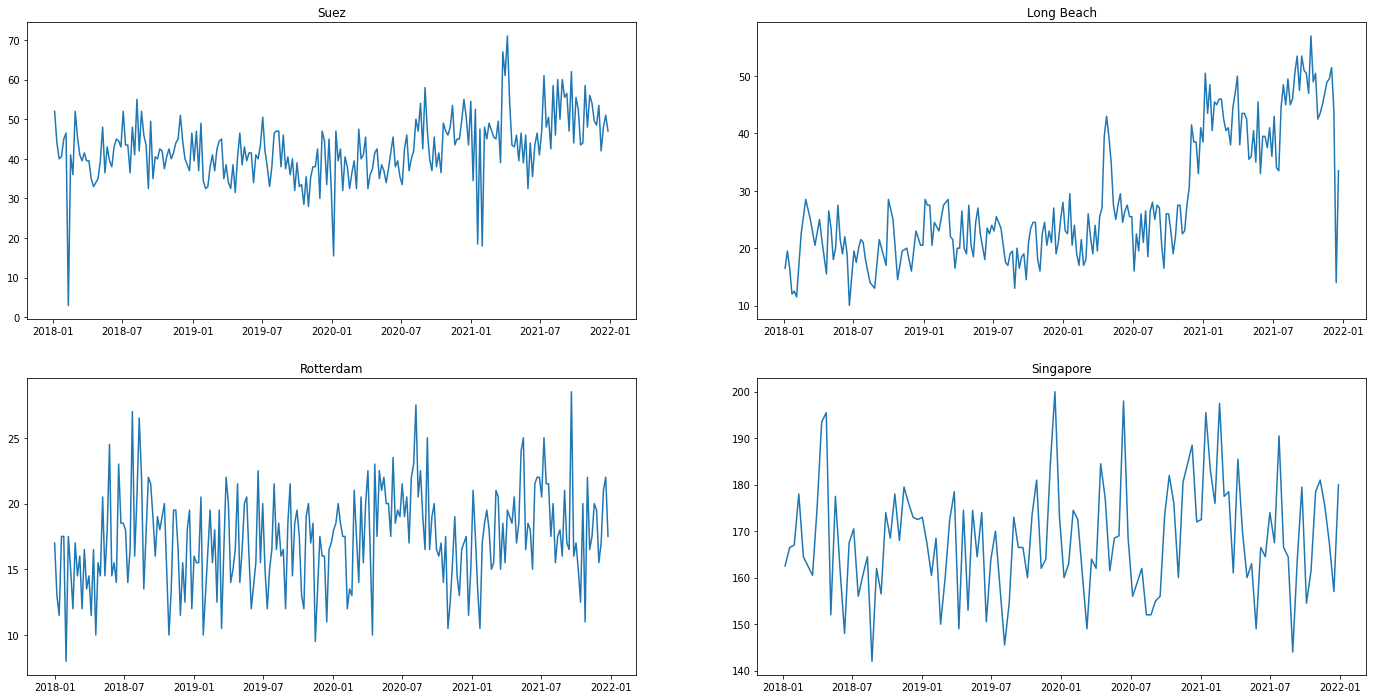

In [ ]:
fig0, ax = pl.subplots(2, 2, figsize=(24,12))
ax[0,0].plot(suez.ds, suez.y)
ax[0,0].set_title("Suez")
ax[0,1].plot(long_beach.ds, long_beach.y)
ax[0,1].set_title("Long Beach")
ax[1,0].plot(rotterdam.ds, rotterdam.y)
ax[1,0].set_title("Rotterdam")
ax[1,1].plot(singapore.ds, singapore.y)
ax[1,1].set_title("Singapore")

**Fig 1.** Timeseries plot for each port

In [ ]:
# Let's standardize first our data
suez['y'] = preprocessing.scale(suez.y)
suez['y_err'] = preprocessing.scale(suez.y_err)

long_beach['y'] = preprocessing.scale(long_beach.y)
long_beach['y_err'] = preprocessing.scale(long_beach.y_err)

rotterdam['y'] = preprocessing.scale(rotterdam.y)
rotterdam['y_err'] = preprocessing.scale(rotterdam.y_err)

singapore['y'] = preprocessing.scale(singapore.y)
singapore['y_err'] = preprocessing.scale(singapore.y_err)

In [ ]:
singapore.head()

,ds,y,y_err
0,2018-01-06,-0.517950,0.746499
1,2018-01-18,-0.184427,-1.278487
2,2018-01-30,-0.142736,-0.012871
3,2018-02-11,0.774451,-1.025364
4,2018-02-23,-0.351188,-0.772241


In [ ]:
m_suez = Prophet().fit(suez[['ds','y']])
m_long_beach = Prophet().fit(long_beach[['ds','y']])
m_rotterdam = Prophet().fit(rotterdam[['ds','y']])
m_singapore = Prophet().fit(singapore[['ds','y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
simplem_sz= m_suez.predict(suez[['ds','y']])
simplem_lb = m_long_beach.predict(long_beach[['ds','y']])
simplem_rt = m_rotterdam.predict(rotterdam[['ds','y']])
simplem_sp = m_singapore.predict(singapore[['ds','y']])

Text(0.5, 1.0, 'Singapore')

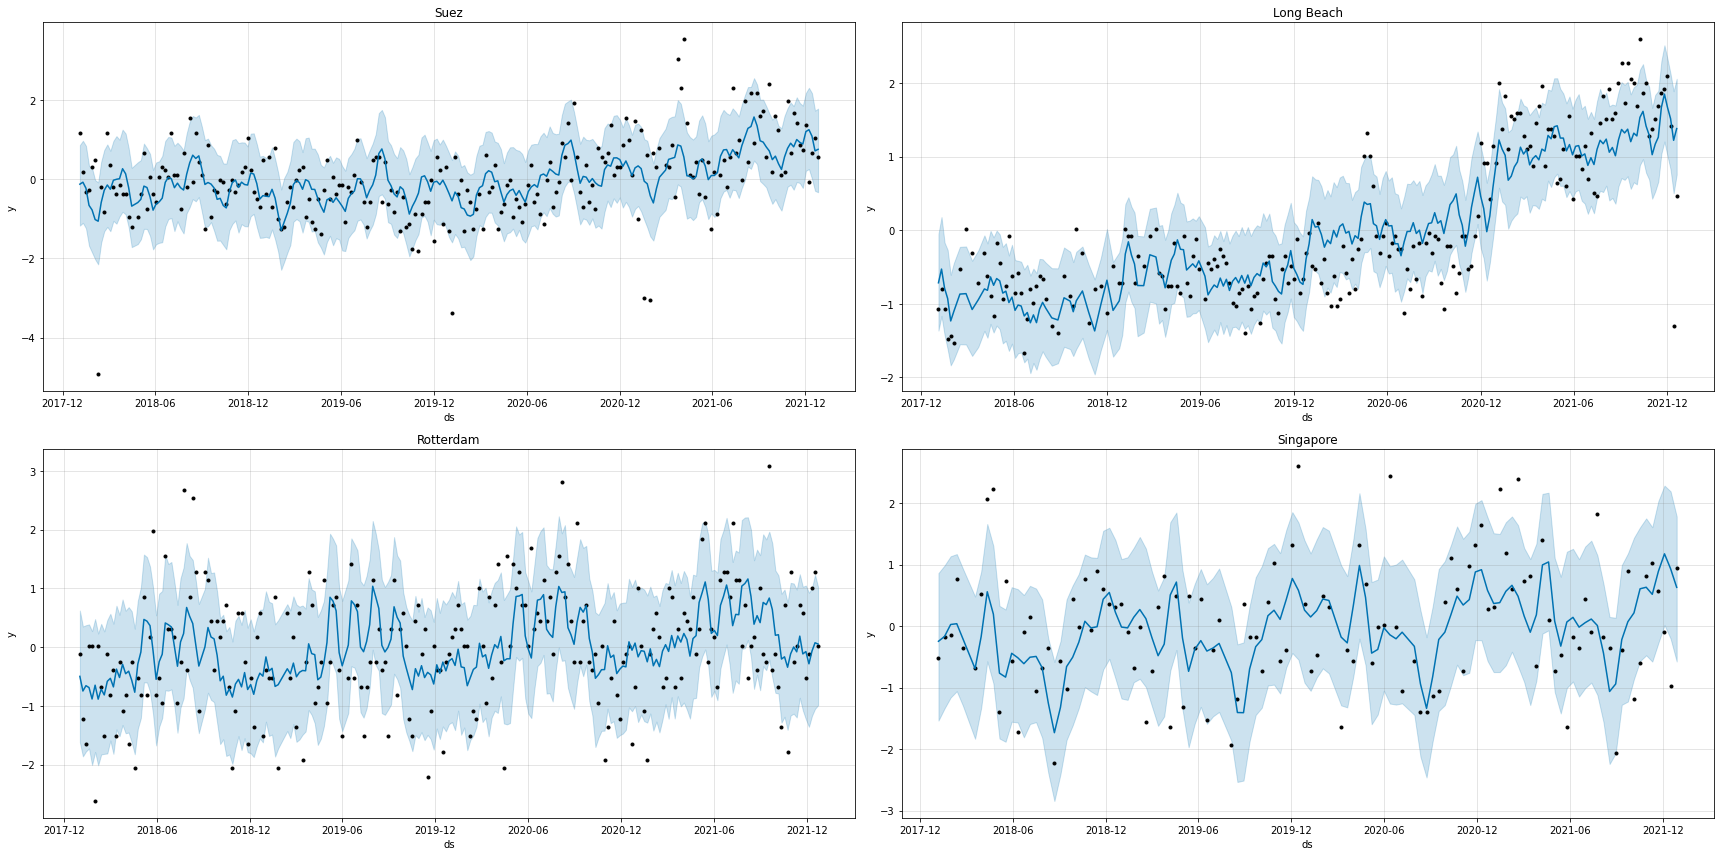

In [ ]:
fig1, ax = pl.subplots(2, 2, figsize = (24,12))
m_suez.plot(simplem_sz, ax = ax[0,0]);
ax[0,0].set_title("Suez")
m_long_beach.plot(simplem_lb, ax = ax[0,1]);
ax[0,1].set_title("Long Beach")
m_rotterdam.plot(simplem_rt, ax = ax[1,0]);
ax[1,0].set_title("Rotterdam")
m_singapore.plot(simplem_sp, ax = ax[1,1]);
ax[1,1].set_title("Singapore")
#pl.plot(suez.ds, suez.y, '--r')

TypeError: ignored

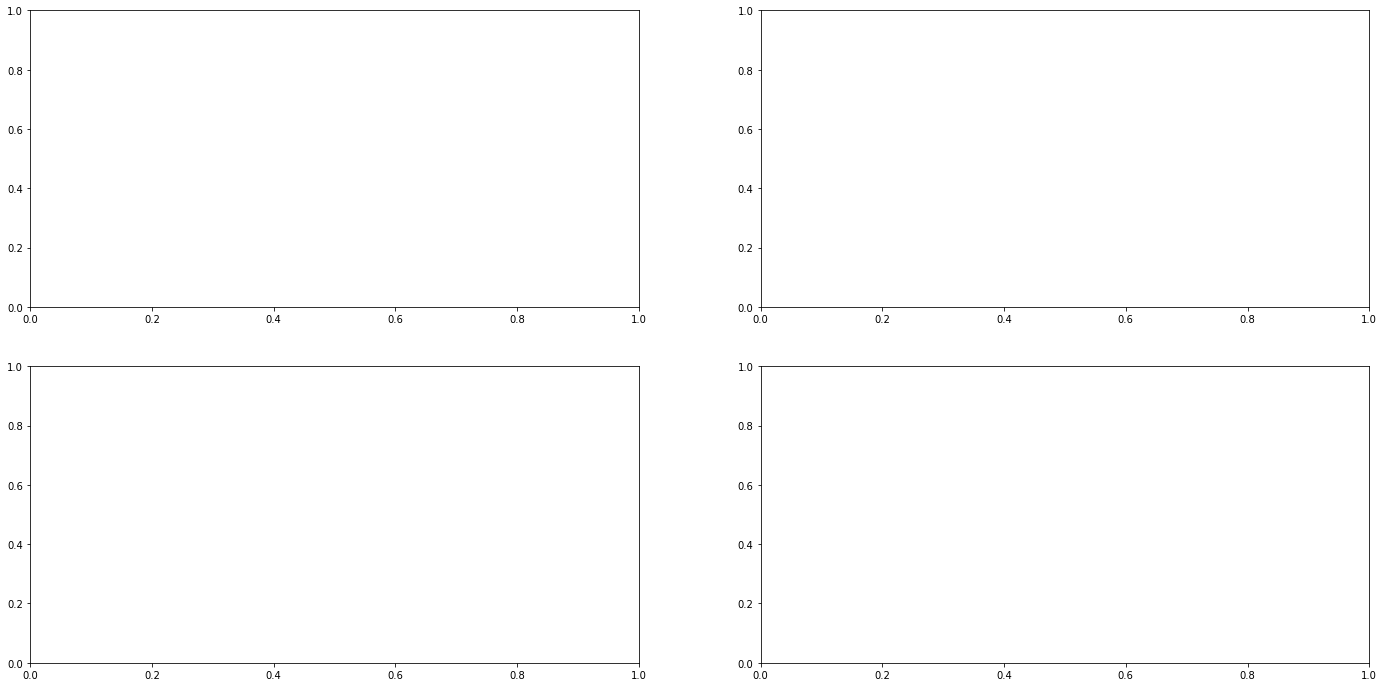

In [ ]:
fig2, ax = pl.subplots(2, 2, figsize = (24,12))
m_suez.plot_components(simplem_sz, ax = ax[0,0]);
ax[0,0].set_title("Suez")
m_long_beach.plot_components(simplem_lb, ax = ax[0,1]);
ax[0,1].set_title("Long Beach")
m_rotterdam.plot_components(simplem_rt, ax = ax[1,0]);
ax[1,0].set_title("Rotterdam")
m_singapore.plot_components(simplem_sp, ax = ax[1,1]);
ax[1,1].set_title("Singapore")

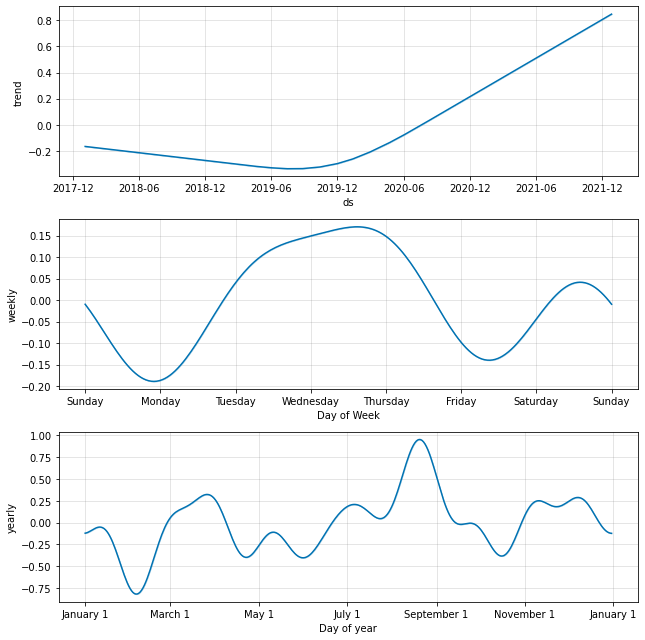

In [ ]:
fig2 = m_suez.plot_components(simplem_sz)

Seasonality components

Read the covid dataset and select the countries relevant for each port.
An alternative approach will use the global number of covid cases for all ports.

We should discuss if the relevant number is the new cases or the cumulative cases

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/lifewinning/MLTSA22_final/main/data/WHO-COVID-19-global-data.csv')

In [ ]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
covid.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [ ]:
covid.Country_code.unique()

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'XA', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR',
       'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE',
       'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI',
       'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR',
       'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM',
       nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE

In [ ]:
covid['Date_reported'] = pd.to_datetime(covid.Date_reported)
covid.rename(columns = {'Date_reported':'ds'}, inplace = True)

In [ ]:
eg_covid = covid[covid.Country_code == 'EG']
us_covid = covid[covid.Country_code == 'US']
nl_covid = covid[covid.Country_code == 'NL']
sg_covid = covid[covid.Country_code == 'SG']

In [ ]:
sg_covid.head()

,ds,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
160576,2020-01-03,SG,Singapore,WPRO,0,0,0,0
160577,2020-01-04,SG,Singapore,WPRO,0,0,0,0
160578,2020-01-05,SG,Singapore,WPRO,0,0,0,0
160579,2020-01-06,SG,Singapore,WPRO,0,0,0,0
160580,2020-01-07,SG,Singapore,WPRO,0,0,0,0


In [ ]:
eg_covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,832.000000,832.000000,832.000000,832.000000
mean,615.356971,197071.682692,29.473558,10880.975962
std,585.329151,148530.652672,22.524313,7956.433740
min,0.000000,0.000000,0.000000,0.000000
25%,131.000000,92830.750000,11.000000,4681.250000
50%,578.000000,177847.000000,26.000000,10325.500000
75%,909.000000,295198.000000,47.000000,16924.500000
max,5516.000000,511977.000000,97.000000,24522.000000


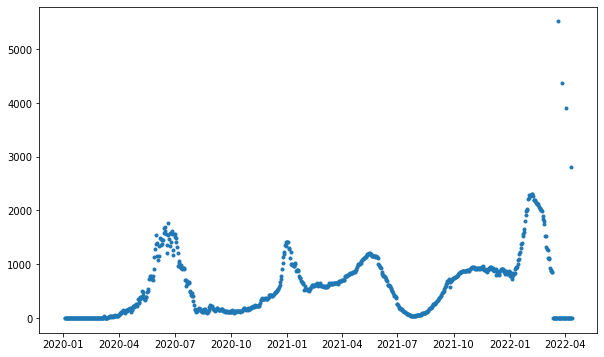

In [ ]:
fig0 = pl.figure(figsize = (10,6))
pl.plot(eg_covid.ds, eg_covid.New_cases, '.')

In [ ]:
suez_covid = pd.merge(suez,eg_covid.drop(['Country_code','Country', 'WHO_region'], axis = 1), on= 'ds', how = 'left')

In [ ]:
suez_covid.head()

,ds,y,y_err,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2018-01-04,52.0,1.0,NaN,NaN,NaN,NaN
1,2018-01-10,44.0,2.0,NaN,NaN,NaN,NaN
2,2018-01-16,40.0,2.0,NaN,NaN,NaN,NaN
3,2018-01-22,40.5,3.5,NaN,NaN,NaN,NaN
4,2018-01-28,45.0,1.0,NaN,NaN,NaN,NaN


In [ ]:
suez_covid.shape

(241, 7)

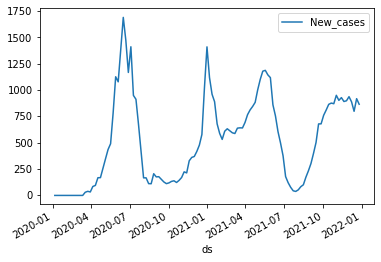

In [ ]:
suez_covid.plot(x = 'ds', y = 'New_cases')

In [ ]:
suez_covid['New_cases'] =  suez_covid['New_cases'].fillna(0)

Model adding the number of new covid cases in Egypt

In [ ]:
m_covid = Prophet()

In [ ]:
m_covid.add_country_holidays(country_name='EG')
m_covid.add_regressor('New_cases')

In [ ]:
#m_covid.fit(eg_covid.drop(['Cumulative_cases', 'New_deaths', 'Cumulative_deaths'], axis = 1))
m_covid.fit(suez_covid)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
predict_covid = m_covid.predict(suez_covid)

Text(75.375, 0.5, '# Ships')

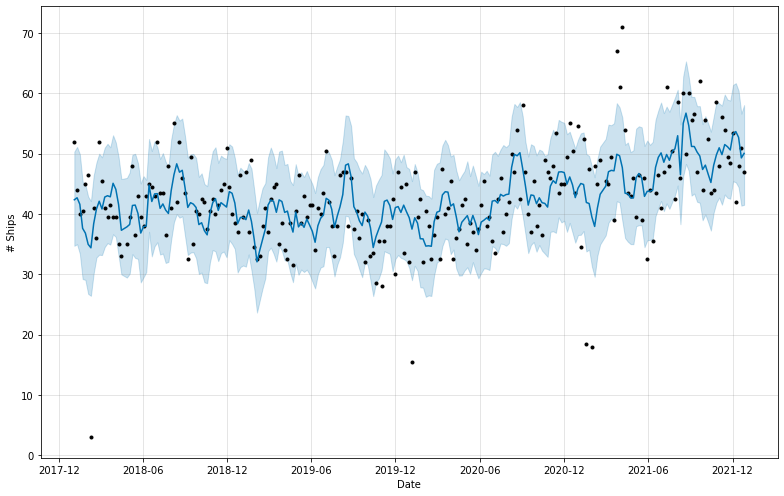

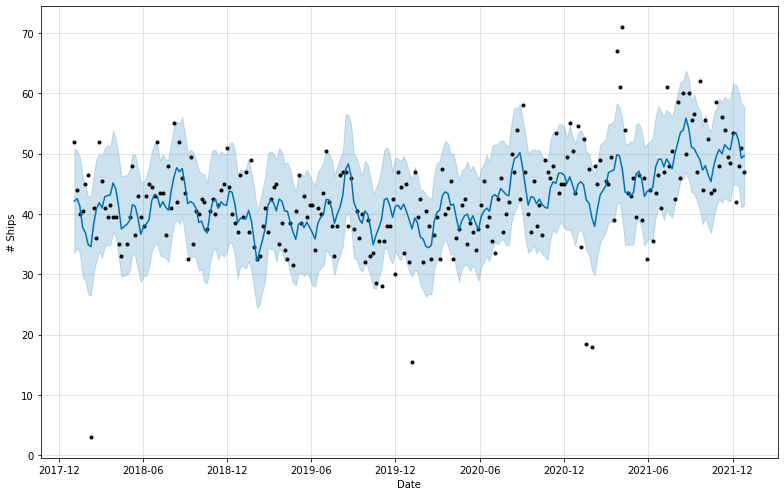

In [ ]:
fig1 = m_covid.plot(predict_covid, figsize = (11, 7));
#a = add_changepoints_to_plot(fig1.gca(), m_covid, predict_covid)
#pl.plot(suez.ds, suez.y, '--r')
pl.xlabel('Date')
pl.ylabel('# Ships')
fig1 = m.plot(simplem, figsize = (11, 7));
#pl.plot(suez.ds, suez.y, '--r')
pl.xlabel('Date')
pl.ylabel('# Ships')